## Çok sınıflı sınıflandırma (Multiclass classification)

* Önceki görevde ikili (binary) bir sınıflandırma problemini çözdük.  
* Peki ya **çok sınıflı (multiclass) bir sınıflandırma problemi**?

🎯 Egzersizin Amaçları:
- Çok sınıflı bir sınıflandırma problemi için tasarlanmış bir Sinir Ağı (Neural Network) yazmak
- Bu modelin ne kadar kolay **overfit** olabileceğini gözlemlemek… !

## (1) Bir `Blobs` veri kümesi oluşturun

📚 Sklearn’deki **`make_blobs`** fonksiyonu [(dokümantasyona bakınız)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) aşağıdakileri üretmenize olanak tanır:
- İstenilen sayıda veri örneği (`n_samples` parametresi)
- Her veri örneği için istenilen sayıda özellik (`n_features` parametresi)
- İstenilen sayıda sınıf/kategori (`centers` parametresi)
- Sınıflar arasındaki mesafe (`cluster_std` parametresi)

💡 Ayrıca, verinin **deterministik** olarak (aynı şekilde) üretilmesini ve tekrar edilebilir olmasını sağlayan `random_state` parametresi de vardır.


❓ Belgelere göre:

👽 Aşağıdakilerle bir ***blobs*** veri kümesi oluşturun:
- 1200 örnek
- Örnek başına 8 özellik
- 7 veri kategorisi
- Kategoriler arasındaki mesafe 8

🔮 1'e eşit bir `random_state` seçin.

📏 Şekli yazdırın ve `X` için (1200, 8) ve `y` için (1200,) ile eşleştiğini kontrol edin ❓

In [ ]:
from sklearn.datasets import make_blobs

X, y= make_blobs(n_samples= 1200, n_features=8, centers= 7, cluster_std=8, random_state= 1)

print("X shape: ", X.shape)
print("Y shape: ", y.shape)



X shape:  (1200, 8)
Y shape:  (1200,)


❓ _matplotlib_ kullanarak bu blob veri kümesinin iki (rastgele) boyutunun dağılım grafiğini çizin. Her nokta, ait olduğu kategoriye göre renklendirilmelidir. ❓

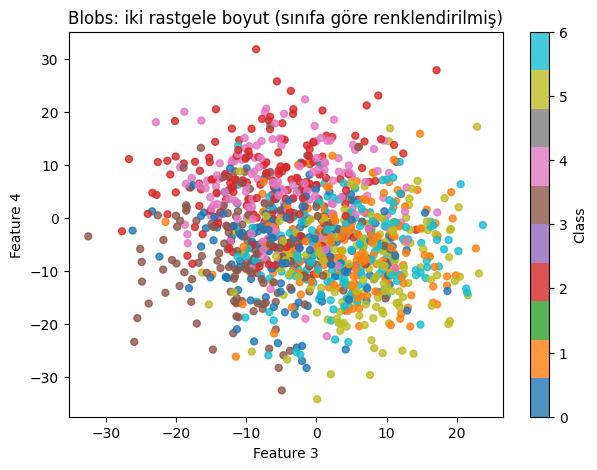

In [15]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.default_rng(1)
i, j = rng.choice(X.shape[1], size=2, replace= False)


plt.figure(figsize=(7, 5))
sc = plt.scatter(X[:, i], X[:, j], c=y, s=25, alpha=0.8, cmap="tab10")
plt.xlabel(f"Feature {i}")
plt.ylabel(f"Feature {j}")
plt.title("Blobs: iki rastgele boyut (sınıfa göre renklendirilmiş)")
plt.colorbar(sc, label="Class")
plt.show()

❓ Diğer boyutlarda da aynı işlemi tekrarlayın. Veri noktalarının kolayca ayrılmadığını görsel olarak görebilirsiniz ❓

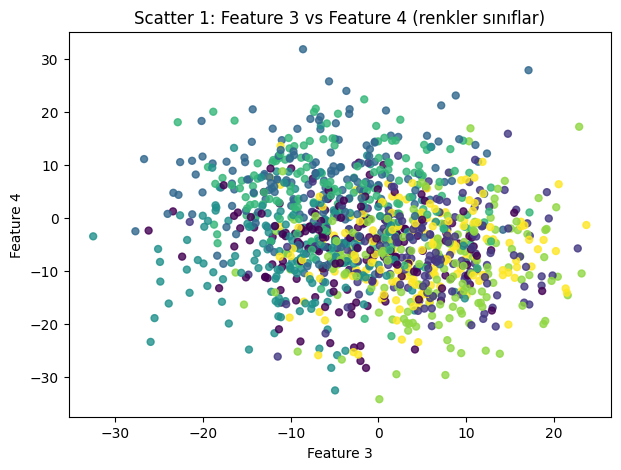

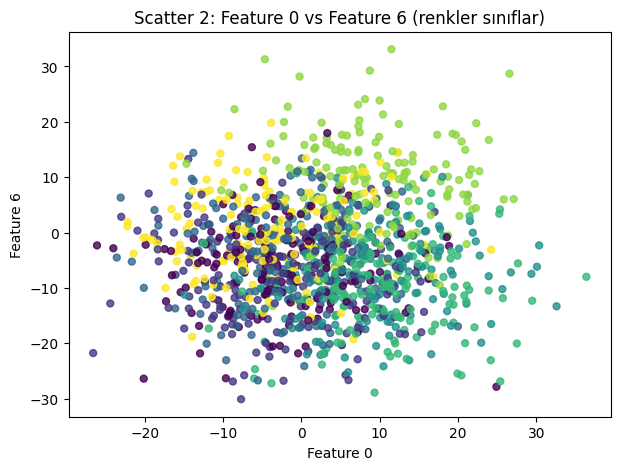

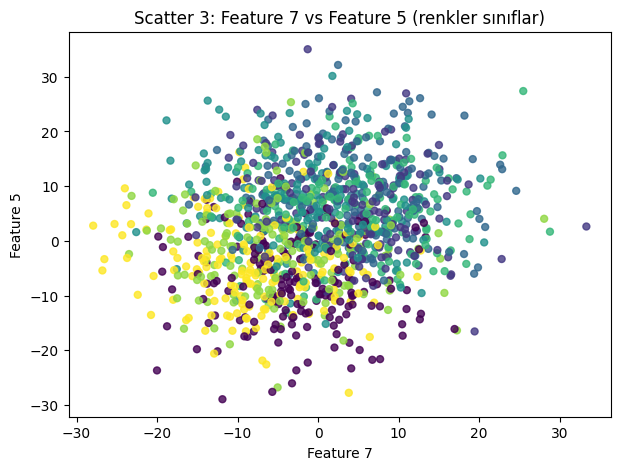

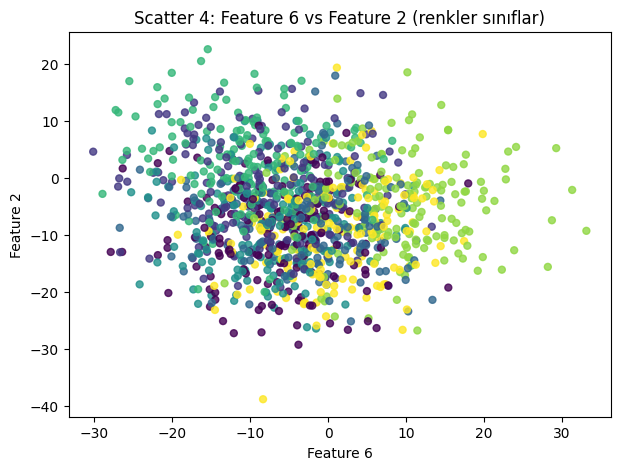

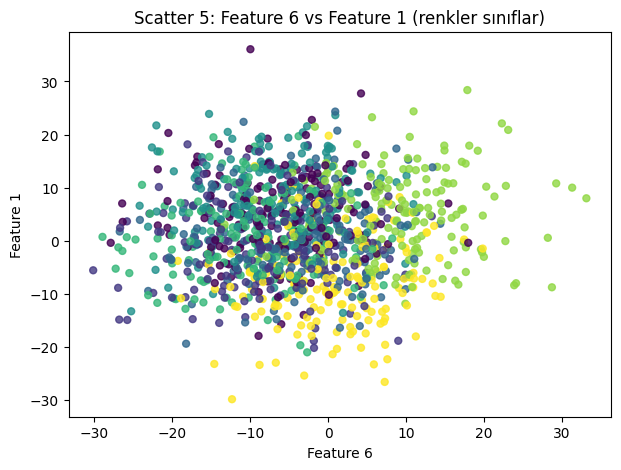

In [16]:
rng = np.random.default_rng(1)

n_plots = 5

for k in range(n_plots):
    i, j = rng.choice(X.shape[1], size=2, replace=False)

    plt.figure(figsize=(7, 5))
    plt.scatter(X[:, i], X[:, j], c=y, s=25, alpha=0.8)
    plt.xlabel(f"Feature {i}")
    plt.ylabel(f"Feature {j}")
    plt.title(f"Scatter {k+1}: Feature {i} vs Feature {j} (renkler sınıflar)")
    plt.show()

## (2) Çok sınıflı sınıflandırma probleminin hedefini kodlama

👉 Şu an için hedef `y`, giriş verisinin ait olduğu kategoriyi temsil eden **tamsayılar listesidir**. Şöyle görünür:  
`[3, 2, 2, 3, 0, 5, 1, 1, 0, 5, ...]`  
(bu örnekte 0’dan 6’ya kadar **7 kategori** vardır).

🧑🏻‍🏫 Ancak **Tensorflow/Keras’ta kategorik problemler için hedef/çıktı (`target/output`) aşağıdaki şekilde encode edilmelidir**:

```
[
[0, 0, 0, 1, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[1, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 1, 0], 
[0, 1, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1],
...
]
```


Burada:
- satır sayısı, **gözlem sayısına** eşittir  
- sütun sayısı, **farklı kategori sayısına** eşittir  

👉 Her sütun bir **kategoriyi** temsil eder.  

👉 Her satır bir **hedefi** temsil eder; `1` değeri, giriş verisinin ait olduğu kategoriyi gösterir.  

Bir satırı, olasılık vektörü olarak düşünebilirsiniz.

```
Örnek:
| Cat 0 | Cat 1 | Cat 2 | Cat 3 | Cat 4 | Cat 5 | Cat 6 |
|-------|-------|-------|-------|-------|-------|-------|
| 0     | 0     | 0     | 1     | 0     | 0     | 0     |

Bu, ilgili satırın %100 olasılıkla Cat 3’e ait olduğu anlamına gelir.
Cat 3
```


---

💡 `y`’yi kategorik hale dönüştürmek için **Tensorflow/Keras içindeki `to_categorical`** fonksiyonunu kullanın.

<details>
    <summary><i>Tensorflow/Keras’taki <code>to_categorical</code> ile Scikit-Learn’deki <code>OneHotEncoder</code> arasında bir benzerlik var mı?</i></summary>

Evet! **`to_categorical`**, Sklearn’deki `OneHotEncoder` gibi çalışır;  
ancak burada bir **kategorik feature** değil, **kategorik target (hedef)** encode edilir.

</details>

---

❓ **Kategorik hedefin kodlanması**:  `y` yazdırın, ardından *to_categorical* işlevini *`y`* üzerinde uygulayın ve *y'nin kategorize edilmiş halini* `y_cat` adlı bir değişkene kaydedin. ❓

In [41]:
from tensorflow.keras.utils import to_categorical

y_cat = to_categorical(y, num_classes= 7)

y_cat, y_cat.shape, np.unique(y_cat)

(array([[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]),
 (1200, 7),
 array([0., 1.]))

In [ ]:
y[:10], y.shape, np.unique(y)

(array([2, 2, 5, 1, 2, 5, 4, 2, 0, 1]), (1200,), array([0, 1, 2, 3, 4, 5, 6]))

## (3) Çok Sınıflı Sınıflandırma Görevi için Sinir Ağı

❓ **Hold-out yöntemi**: Veri kümesi $X$ ve $y_{cat}$ 'i _train_ ve _test_ kümelerine ayırın (boyut: 70/30%)

Not: Değişkenleri `X_train`, `X_test`, `y_train` ve `y_test` olarak adlandırın ❓

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y_cat,
    test_size= 0.3,
    random_state= 42
)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (840, 8)
X_test shape:  (360, 8)
y_train shape:  (840, 7)
y_test shape:  (360, 7)


Derin Öğrenmede, herhangi bir Makine Öğrenimi algoritmasında olduğu gibi, sayısal özellikleriniz ölçeklendirilmelidir.

❓ **Ölçeklendirme**: Eğitim kümesine bir Sklearn [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) uydurun ve hem eğitim kümenizi hem de test kümenizi dönüştürün ❓

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

❓ **Modeli başlatma**: Aşağıdaki işlevi tamamlayarak aşağıdaki özelliklere sahip bir model oluşturun/başlatın:
- İlk katman:
   - 50 nöron
   - `relu` aktivasyonu
   - Doğru giriş boyutu
- Çıkış katmanı:
   - Çok sınıflı sınıflandırma görevi için tasarlanmış
   - Her sınıfa ait olma olasılıklarını çıktı olarak veren ❓

In [47]:
X_train_scaled.shape, y_train.shape

((840, 8), (840, 7))

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def initialize_model():

    #############################
    #  1 - Model mimarisi   #
    #############################

    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(y_train.shape[1], activation='softmax'))

    #############################
    #  2 - Optimizasyon Yöntemi #
    #############################
    model.compile(loss='categorical_crossentropy', # binary_crossentropy'den farklıdır çünkü birden fazla sınıfımız vardır
                  optimizer='adam',
                  metrics=['accuracy'])

    return model


model = initialize_model()

❓  Modelde kaç parametre (diğer adıyla ağırlık) vardır? ❓

In [50]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           357 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 807 (3.15 KB)

 Trainable params: 807 (3.15 KB)

 Non-trainable params: 0 (0.00 B)

❓ **Modeli uydurma**: Modelinizi 50 dönemlik tren verilerine uydurun ve geçmişi çizin ❓

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1679 - loss: 2.0735 - val_accuracy: 0.2361 - val_loss: 1.9481
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2810 - loss: 1.8165 - val_accuracy: 0.3444 - val_loss: 1.7346
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4250 - loss: 1.6170 - val_accuracy: 0.4722 - val_loss: 1.5735
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5393 - loss: 1.4590 - val_accuracy: 0.5389 - val_loss: 1.4375
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5976 - loss: 1.3281 - val_accuracy: 0.5611 - val_loss: 1.3246
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6310 - loss: 1.2188 - val_accuracy: 0.5972 - val_loss: 1.2278
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6595 - loss: 1.1275 - val_accuracy: 0.6083 - val_loss: 1.1510
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6762 - loss: 1.0538 - val_accuracy: 0.6167 - val_loss:

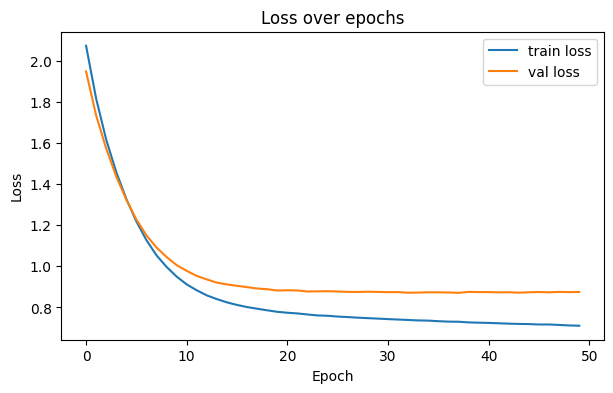

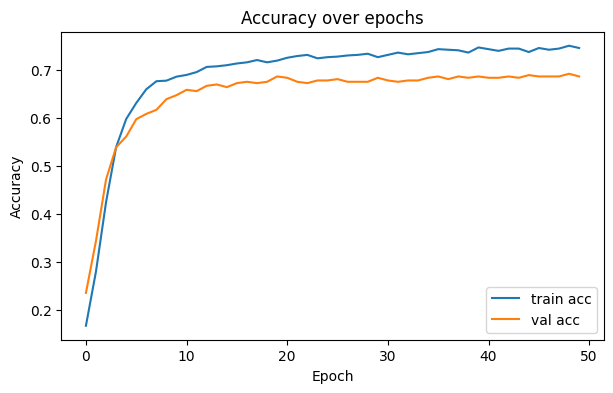

In [51]:
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

plt.figure(figsize=(7, 4))
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over epochs")
plt.legend()
plt.show()

plt.figure(figsize=(7, 4))
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over epochs")
plt.legend()
plt.show()


❓ **Değerlendirme**:  Modelinizi test setinde değerlendirin ve doğruluğu yazdırın ❓

In [52]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.8757
Test Accuracy: 0.6861


❓ 🤔 Bu iyi bir puan mı? Bunu bir tür karşılaştırma değeriyle karşılaştırmalısınız. Bu durumda, rastgele bir tahminle ne kadar puan elde edilebilir? Bu temel puanı `accuracy_baseline` değişkeninde saklayın. ❓

(Bunun için kod yazmanıza gerek yok, sadece veri setimizin nasıl oluşturulduğunu düşünün.)

In [53]:
n_classes = y_train.shape[1] 
accuracy_baseline = 1 / n_classes
accuracy_baseline

0.14285714285714285

🧪 **Kodunu Test Et**

In [54]:
from nbresult import ChallengeResult
result = ChallengeResult('baseline',
                         accuracy=accuracy_baseline)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/gunay/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/gunay/code/01-Python/sprint-18/nlp/S18D2-S-Data-multiclass-classification/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_baseline.py::TestBaseline::test_accuracy PASSED                     [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/baseline.pickle

git commit -m 'Completed baseline step'

git push origin master



❗ 👀 Bekle ... Kayıp grafiğine daha yakından bakarsan, 50 dönemden sonra da kayıp hala azalmaya devam ediyor gibi görünüyor. Neden bu kadar erken durduruyorsun ❓❗

❓ Modeli yeniden başlatıp bu sefer 1000 dönemle tekrar çalıştıralım ve geçmişi tekrar grafiğe çizelim. ❓

Epoch 1/1000


/home/gunay/.pyenv/versions/3.12.9/envs/workintech/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2321 - loss: 1.8709 - val_accuracy: 0.3306 - val_loss: 1.7748
Epoch 2/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4048 - loss: 1.6486 - val_accuracy: 0.4639 - val_loss: 1.5902
Epoch 3/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5393 - loss: 1.4734 - val_accuracy: 0.5500 - val_loss: 1.4435
Epoch 4/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6262 - loss: 1.3295 - val_accuracy: 0.5889 - val_loss: 1.3204
Epoch 5/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6524 - loss: 1.2134 - val_accuracy: 0.6083 - val_loss: 1.2213
Epoch 6/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6655 - loss: 1.1200 - val_accuracy: 0.6333 - val_loss: 1.1412
Epoch 7/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6702 - loss: 1.0442 - val_accuracy: 0.6500 - val_loss: 1.0796
Epoch 8/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6786 - loss: 0.9858 - val_accuracy: 0.6556 - val_l

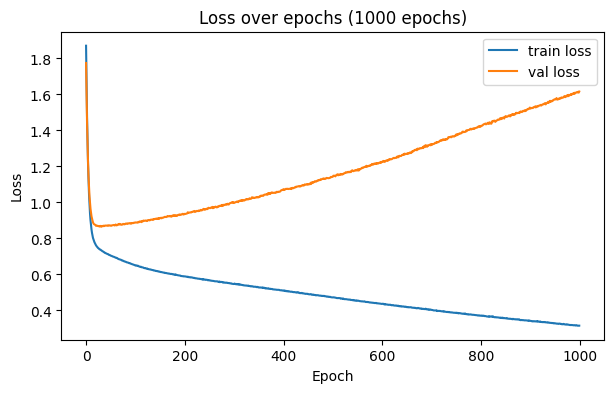

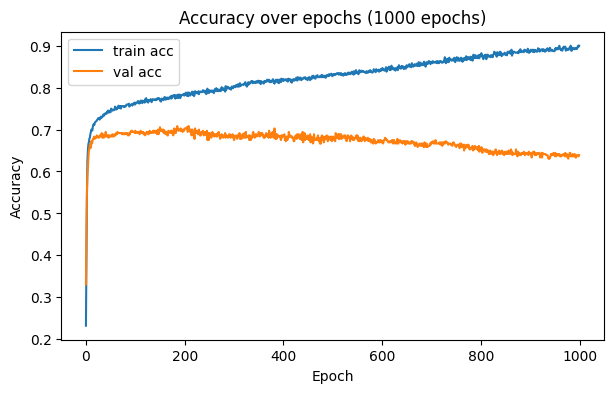

In [55]:
# modeli yeniden başlat (sıfırdan ağırlıklar)
model = initialize_model()

history_1000 = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=1000,
    batch_size=32,
    verbose=1
)

plt.figure(figsize=(7, 4))
plt.plot(history_1000.history["loss"], label="train loss")
plt.plot(history_1000.history["val_loss"], label="val loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over epochs (1000 epochs)")
plt.legend()
plt.show()

plt.figure(figsize=(7, 4))
plt.plot(history_1000.history["accuracy"], label="train acc")
plt.plot(history_1000.history["val_accuracy"], label="val acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over epochs (1000 epochs)")
plt.legend()
plt.show()


❓ **Bir modeli daha uzun süre eğitirken...** ❓
- Yeni kayıp hakkında ne söyleyebilirsiniz?
- Modelinizi test setinde bir kez daha değerlendirin ve doğruluğu yazdırın.

In [56]:
# 1) Yeni kayıp (validation loss) hakkında sayısal ipuçları
val_losses = history_1000.history["val_loss"]
train_losses = history_1000.history["loss"]

best_epoch = int(np.argmin(val_losses)) + 1  
best_val_loss = float(np.min(val_losses))
final_val_loss = float(val_losses[-1])
final_train_loss = float(train_losses[-1])

print(f"En düşük val_loss epoch: {best_epoch}")
print(f"En düşük val_loss: {best_val_loss:.4f}")
print(f"Son epoch train_loss: {final_train_loss:.4f}")
print(f"Son epoch val_loss: {final_val_loss:.4f}")

# 2) Modeli test setinde tekrar değerlendir (1000 epoch sonrası)
test_loss_1000, test_acc_1000 = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss (1000 epochs): {test_loss_1000:.4f}")
print(f"Test Accuracy (1000 epochs): {test_acc_1000:.4f}")


En düşük val_loss epoch: 32
En düşük val_loss: 0.8654
Son epoch train_loss: 0.3156
Son epoch val_loss: 1.6165
Test Loss (1000 epochs): 1.6165
Test Accuracy (1000 epochs): 0.6389


* 😁 Tren setinde hesaplanan kayıp, 50 epok ile karşılaştırıldığında 1000 epok ile daha küçük görünüyor.
* 😟 Anc ak test setindeki doğruluk, 50 epok ile karşılaştırıldığında 1000 epok ile daha kötü...

❓ Bu fenomene ne denir? ❓

Overfitting

Model, verinin genel desenlerini öğrenmeyi bırakıp eğitim setine özgü detayları (gürültüyü) öğrenmeye başlamıştır.

---

🤔 Bunun olmasını önlemek için ne yapmalıyız? 

<details>
    <summary><i>Olası seçenekler</i></summary>
    

⚠️ Sinir ağlarında aşırı uyumun olmasını önlemek için, örneğin şunları yapabiliriz:
1. Sinir ağının gürültülü veri noktalarından çok fazla öğrenmesini önlemek için ***makul sayıda dönem*** seçin
2. ***Erken Durdurma*** kriteri, yani _.fit()_ 📆 cf. ***Derin Öğrenme > Optimize Ediciler, Kayıp, Uydurma***

</details>    

---


❓ Test kaybının pratikte ne zaman tekrar artmaya başladığını görsel olarak kontrol edelim.  Aşağıdaki komutu çalıştırın ve geçmişi çizin❓

In [59]:
import matplotlib.pyplot as plt

def plot_history(history):
    # Loss
    plt.figure(figsize=(7, 4))
    plt.plot(history.history["loss"], label="train loss")
    if "val_loss" in history.history:
        plt.plot(history.history["val_loss"], label="val loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss over epochs")
    plt.legend()
    plt.show()

    # Accuracy
    plt.figure(figsize=(7, 4))
    plt.plot(history.history.get("accuracy", []), label="train acc")
    if "val_accuracy" in history.history:
        plt.plot(history.history["val_accuracy"], label="val acc")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Accuracy over epochs")
    plt.legend()
    plt.show()


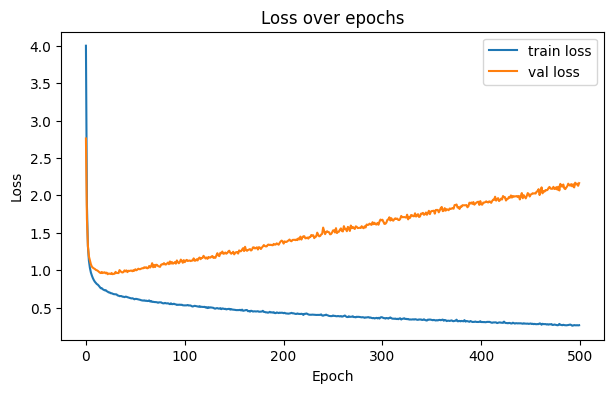

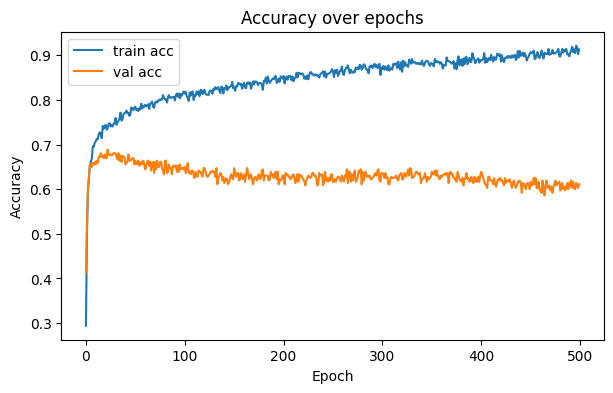

In [60]:
model = initialize_model()

history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=500,
                    batch_size=16,
                    verbose=0)
plot_history(history)

😱 Ama durun... test setini kullanırsak hile yapmış olmaz mıyız? Evet, oluruz. Ama yine sabırlı olun. ***Derin Öğrenme - Optimize Ediciler, Kayıp, Uydurma*** bölümünde, bunu önlemek için ***Doğrulama Seti*** adını verdiğimiz şeyi kullanacağız!

🧘🏻‍♀️ Şimdilik, sonraki sorulara geçelim!

❓ **Ağı değerlendirme**: <span style="color:blue">eğitim seti</span> ve <span style="color:orange">test seti</span> üzerindeki kayıp ve doğruluk değerlerini grafik olarak gösterin. Bu konuda ne söyleyebilirsiniz? ❓ 

In [58]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

🤔 Derin Öğrenme modelimiz neden bu kadar kolay aşırı uyum sağlıyor?

😳 Düşünün, sinir ağımız sadece 8 özellik içeren bir veri kümesinden basit bir sınıflandırma görevi için ~800 parametre öğrenmek zorunda! Üstelik, uyum sağlamak için toplamda sadece ~800 veri noktamız var! Model, eğitim kümesindeki her noktanın tam sınıfını neredeyse “öğrenebilir”. 

Buna karşılık, basit bir Lojistik Regresyon, bu blob veri kümesinin kalıplarını yakalamak için sadece 9 parametreyi öğrenmek zorunda kalırdı! 

😏 Derin öğrenme etkileyici bir kavramdır, ancak basit makine öğrenimi görevleri için açıkça aşırı ve gereksiz bir seçenek olabilir!

⭐️ Aşağıdakiler için son derece yararlı olacaktır:
- 📸 Görüntü işleme
- 💹 Zaman serileri
- 🗣 Doğal dil işleme

---

🏁 Tebrikler!

💾 Not defterinizi `git add/commit/push` yapmayı unutmayın...

🚀 ... ve bir sonraki göreve geçin!